In [11]:
from google.colab import files
Uploaded = files.upload()

Saving USA_Housing.csv to USA_Housing (2).csv


In [12]:
import pandas as pd
df =pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


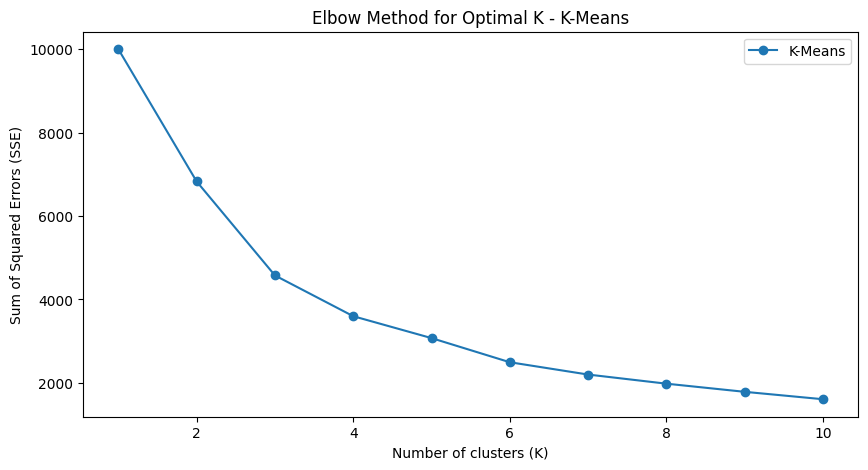

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = df[['Avg. Area Income', 'Avg. Area House Age']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def calculate_kmeans_sse(X, max_k):
    sse = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
    return sse
max_k = 10
kmeans_sse = calculate_kmeans_sse(X_scaled, max_k)

plt.figure(figsize=(10, 5))
plt.plot(range(1, max_k + 1), kmeans_sse, marker='o', label='K-Means')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal K - K-Means")
plt.legend()
plt.show()


In [23]:
k=3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_

df['Cluster'] = labels
print(df.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  Cluster  
0                          4.09      23086.80050  1.059034e+06        0  
1                          3.09      40173.07217  1.505891e+06        0  
2                          5.13      36882.15940  1.058988e+06        2  
3                          3.26      34310.24283  1.260617e+06        2  
4                          4.23      26354.10947  6.309435e+05        1  


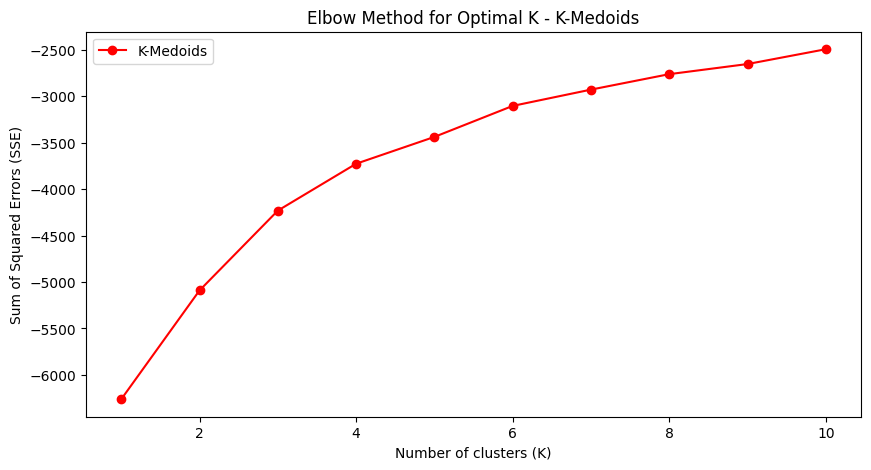

In [24]:
#!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

def calculate_kmedoids_sse(X, max_k):
    sse = []
    for k in range(1, max_k + 1):
        kmedoids = KMedoids(n_clusters=k, random_state=0)
        kmedoids.fit(X)
        sse.append(-kmedoids.inertia_)
    return sse

kmedoids_sse = calculate_kmedoids_sse(X_scaled, max_k)

plt.figure(figsize=(10, 5))
plt.plot(range(1, max_k + 1), kmedoids_sse, marker='o', color='red', label='K-Medoids')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal K - K-Medoids")
plt.legend()
plt.show()

In [25]:
k=3
kmedoids = KMedoids(n_clusters=k, random_state=0)
clusters = kmedoids.fit_predict(X_scaled)
df['Cluster'] = clusters
print(df.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  Cluster  
0                          4.09      23086.80050  1.059034e+06        0  
1                          3.09      40173.07217  1.505891e+06        0  
2                          5.13      36882.15940  1.058988e+06        1  
3                          3.26      34310.24283  1.260617e+06        2  
4                          4.23      26354.10947  6.309435e+05        1  
